In [5]:
pip install spacy nltk

Note: you may need to restart the kernel to use updated packages.


In [6]:
import spacy
import re

In [8]:
nlp = spacy.load('en_core_web_sm')

In [9]:
def read_file_and_print_emails(file):
    with open(file) as f:
        data = f.read()
    emails = re.findall('[\w\d_-]+[\@]([\w]+)',data)
    print(emails)


In [10]:
read_file_and_print_emails('testing.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'testing.txt'

In [11]:
def convert_to_standard_format(phone_number):
    # Remove non-digit characters from the phone number
    digits_only = re.sub(r'\D', '', phone_number)
    return digits_only

In [12]:
def read_file_and_list_phone_numbers(file):
    with open(file) as f:
        data = f.readlines()
    for phone_number in data:
        phone_number = phone_number.strip()
        standard_format = convert_to_standard_format(phone_number)
        print(standard_format.strip())


In [13]:
read_file_and_list_phone_numbers('testing.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'testing.txt'

In [14]:
def read_html_file_and_fetch_url(html_file):
    with open(html_file) as file:
        data = file.read()
    all_links = re.findall(r'https://[\w\d_.-]+', data)
    print(all_links)

In [15]:
read_html_file_and_fetch_url('testing.html')

FileNotFoundError: [Errno 2] No such file or directory: 'testing.html'

In [16]:
def read_file_and_extract_hashtags(file):
    with open(file) as f:
        data = f.read()
    hashtages = re.findall('#([\w\d_-]+)',data)
    print(hashtages)
    

    

In [17]:
read_file_and_extract_hashtags('testing.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'testing.txt'

In [18]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Poorn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Poorn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


In [20]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def stemming_and_lemma_from_paper(text):
    doc = nlp(text)
    # lemma_text = [each for each in doc]
   
    tokens = word_tokenize(text)
    enties = doc.ents
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens  if token not in stop_words ]
    stemmed_tokens = [stemmer.stem(token) for token in tokens  if token not in stop_words ]
    lemma_counter = {each:0 for each in lemmatized_tokens}
    # print(lemma_counter)
    for each in lemmatized_tokens:
        if each not in stop_words:
            lemma_counter[each] = lemma_counter[each]+1 
    stemma_counter = {each:0 for each in stemmed_tokens}
    for each in stemmed_tokens:
        if each not in stop_words:
            stemma_counter[each] = stemma_counter[each]+1 
   
    return lemma_counter,stemma_counter

In [21]:
lemma_counter,stemm_counter = stemming_and_lemma_from_paper("""
In kidney transplantation, day-zero biopsies are used to assess organ quality and discriminate between donor-inherited lesions and those acquired post- transplantation. However, many centers do not perform such biopsies since they are invasive, costly and may delay the transplant procedure. We aim to generate a non-invasive virtual biopsy system using routinely collected donor parameters. Using 14,032 day-zero kidney biopsies from 17 international centers, we develop a virtual biopsy system. 11 basic donor parameters are used to predict four Banff kidney lesions: arteriosclerosis, arteriolar hyalinosis, interstitial fibrosis and tubular atrophy, and the percentage of renal sclerotic glomeruli. Six machine learning models are aggregated into an ensemble model. The virtual biopsy system shows good performance in the internal and external validation sets. We confirm the generalizability of the system in var- ious scenarios. This system could assist physicians in assessing organ quality, optimizing allograft allocation together with discriminating between donor derived and acquired lesions post-transplantation.

""")

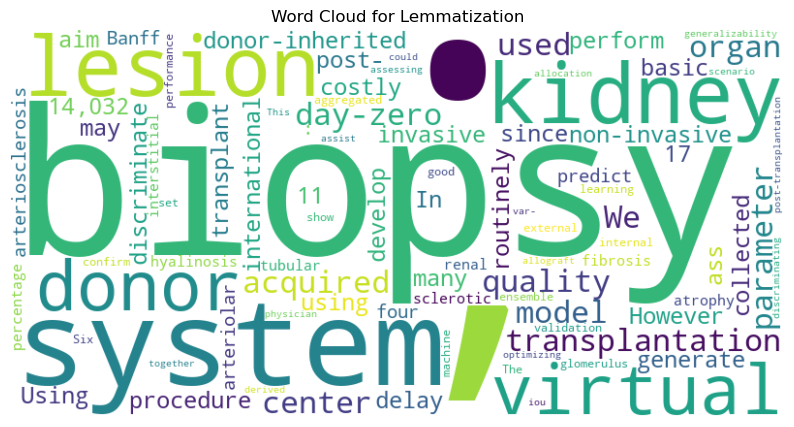

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter



# Count the occurrences of each word
word_counts = Counter(lemma_counter)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Lemmatization')
plt.show()


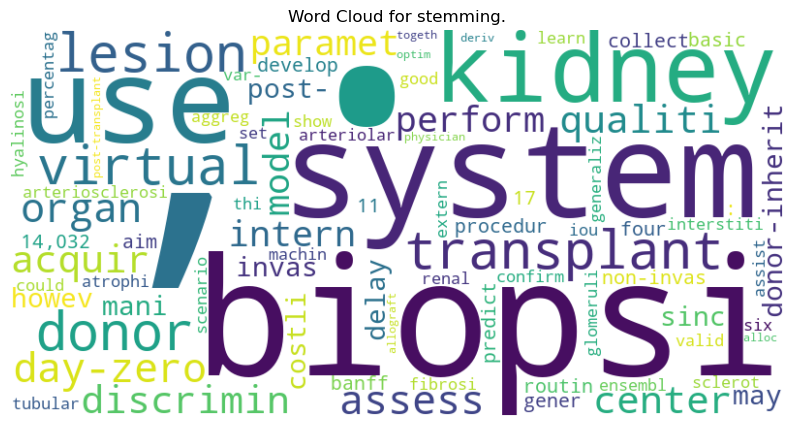

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter



# Count the occurrences of each word
word_counts = Counter(stemm_counter)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for stemming.')
plt.show()


In [ ]:
import tkinter as tk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import spacy
nlp = spacy.load('en_core_web_sm')
from tkinter import scrolledtext
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize


# Apply stemming
# stemmed_tokens = [stemmer.stem(token) for token in tokens]

# Apply lemmatization


def lemma_text():
    input_text = text_entry.get("1.0", "end-1c")
    documents = nlp(input_text)
    lemmatized_tokens = [token.lemma_ for token in documents]
    text = " ".join(lemmatized_tokens)
    output_label.config(text=text)

def stemm_text():

    input_text = text_entry.get("1.0", "end-1c")
    stemmer = PorterStemmer()
    tokens = word_tokenize(input_text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens ]
    text = " ".join(stemmed_tokens)
    output_label.config(text=text)

# Create main window
root = tk.Tk()

# Get screen width and height
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

# Set window size to fullscreen
root.geometry(f"{screen_width}x{screen_height}")

root.title("Text Input and Buttons")

# Create scrolled text widget with padding and larger size
text_entry = scrolledtext.ScrolledText(root, width=60, height=10, font=("Arial", 12))
text_entry.pack(pady=(20,10))

# Create process button
process_button = tk.Button(root, text="Lemmatization", command=lemma_text)
process_button.pack(pady=5)

# Create clear button
clear_button = tk.Button(root, text="Stemming", command=stemm_text)
clear_button.pack(pady=5)

# Create output label
output_label = tk.Label(root, text="", font=("Arial", 12))
output_label.pack(pady=20)

# Run the tkinter event loop
root.mainloop()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Poorn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Poorn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


stop_words = stopwords.words('english')

def stemming_and_lemma_from_bbc(text):
    doc = nlp(text)
    # lemma_text = [each for each in doc]
   
    tokens = word_tokenize(text)
    enties = doc.ents
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens  if token not in stop_words ]
    stemmed_tokens = [stemmer.stem(token) for token in tokens  if token not in stop_words ]
    lemma_counter = {each:0 for each in lemmatized_tokens}
    # print(lemma_counter)
    for each in lemmatized_tokens:
        if each not in stop_words:
            lemma_counter[each] = lemma_counter[each]+1 
    stemma_counter = {each:0 for each in stemmed_tokens}
    for each in stemmed_tokens:
        if each not in stop_words:
            stemma_counter[each] = stemma_counter[each]+1 
   
    return lemma_counter,stemma_counter

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


def create_wordcloud_for_lemmatization(words):
    # Count the occurrences of each word
    word_counts = Counter(words)

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white')

    # Generate the word cloud
    wordcloud.generate_from_frequencies(word_counts)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Lemmatization')
    plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


def create_wordcloud_for_stemming(words):
    # Count the occurrences of each word
    word_counts = Counter(words)

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white')

    # Generate the word cloud
    wordcloud.generate_from_frequencies(word_counts)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Stemming')
    plt.show()


In [25]:
import requests
import time
import datetime
from bs4 import BeautifulSoup
def get_news():
    url = "https://www.bbc.com/live/news"
    response = requests.get(url)
    
    if response.status_code == 200:
        print(f'Succesfully scraped the data at {datetime.datetime.now()}')
        soup = BeautifulSoup(response.text, 'html.parser')
        news_elements = soup.find_all(class_="eUBbBH")
        all_text = " ".join([each.get_text() for each in news_elements ])
        lemma_counter,stemma_counters = stemming_and_lemma_from_bbc(all_text)
        create_wordcloud_for_lemmatization(lemma_counter)
        create_wordcloud_for_stemming(stemma_counters)

    else:
        print("Failed to fetch BBC News Live page")
while True:
    get_news()
    time.sleep(10)  # 300 seconds = 5 minutes


Succesfully scraped the data at 2024-05-07 16:33:16.769340


NameError: name 'stemming_and_lemma_from_bbc' is not defined